# Capstone Project

## Battle of Neighborhoods-Paris
#### To set up new Indian restaurant in Paris 


<a><img src="https://cdn.tasteatlas.com/images/toplistarticles/d0e6a0a79d5f4197a51f4ca065393ffe.jpg?mw=1300" width="1000" height="1300" align="left"></a>

# 1. Introduction

# 1.1 Background


Paris is the capital and the most populous city of France and has a population of more than 2.1 million people. Since the 17th century, Paris has been one of Europe's major centres of finance, diplomacy, commerce, fashion, science and arts. It is the second most expensive city in the world so the residents living closer to the city center are likely to have higher income. And Paris is the most visited city in the world due to its famous heritage sites and museums. With its diverse culture, comes diverse food items. There are many restaurants in Paris, each belonging to different categories like Chinese, Indian , French etc.

# 1.2 Business Problem


The main objective is to set up a new Indian restaurant in the best location in Paris.If any entrepreneur wishes to set up a new Indian restaurant,where should he/she would like to open in a best suitable place in the neighborhood and have the best chance of being successful.Inorder to achieve high success rate we must consider following factors:
<ul>
   <li> Market Places</li>

   <li> Competition in particular location</li>
  
   <li> Aiding places that make people come to restaurants like Gym, Entertaining Public places</li>
  
   <li> Population</li>
  
   <li> Menu from competitors.</li>
</ul>  
Considering these factors, we can find the solution by using data sources provided by Wikipedia and Foursquare API and some Clustering methods. 


# 1.3 Target Audience


<ul><li>Business personnel who want to invest or open a restaurant.</li>

<li>Freelancer who loves to have their own restaurant as a side business.</li>

<li>Finding the best location for opening a restaurant.</li>

<li>Budding Data Scientists, who want to implement some of the most used Exploratory Data Analysis techniques to obtain necessary data, analyze it and, finally, be able to tell a story out of it.</li>
</ul>

# 2.Data Acquisition


The data is acquired from the following sources:
<ul>
    <li><a>https://opendata.paris.fr/explore/dataset/arrondissements/table/?dataChart></a></li>
    <li><a>https://data.opendatasoft.com/explore/dataset/arrondissements%40parisdata/export</a></li>
    <li><a>https://en.wikipedia.org/wiki/Arrondissements_of_Paris</a></li>
</ul>
These are the links to Paris data which consists of neighborhood names ,Arrondissement numbers,perimeter,longitude,latitude,and so on. We filter this data according to our requirements.We can also consider the population present in each neighborhood for our data.
We obtain geographical coordinates of Paris city and also the venues in each neighborhood using Foursquare API.We can also filter these venues to get only Indian Restaurants.This can help us in finding the best suitable place for setting up the restaurant.



# 3.Data Cleaning

We need to outline the initial data that is required:
<ul>
    <li>District data for Paris including names, location data if available, and any other details required.</li>
</ul>
Data Analysis and Location Data:
<ul>
    <li>Foursquare location data will be leveraged to explore or compare districts around Paris.</li>

   <li>Data manipulation and analysis to derive subsets of the initial data.</li>

   <li>Identifying the high traffic areas using data visualization and statistical analysis.</li>
</ul>
Visualization:
<ul>
    <li>Analysis and plotting visualizations.</li>
   <li>Data visualization using various mapping libraries.</li>
</ul>
Discussion and Conclusions:
<ul>
    <li>Recommendations and results based on the data analysis.</li>

   <li>Discussion of any limitations and how the results can be used, and any conclusions that can be drawn.</li> 
</ul>

### Importing the required libraries 

In [1]:
import pandas as pd
import numpy as np
import json
import requests
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors 
import folium

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## Importing Paris Arrondissements Data  

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Arrondissements_.csv")
df

,CAR,NAME,NSQAR,CAR.1,CARINSEE,LAR,NSQCO,SURFACE,PERIMETRE,Geometry_X,Geometry_Y
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


### Acquiring Paris arrondissements data 

In [3]:
df.rename(columns={'NAME': 'Neighborhood', 'CAR': 'Arrondissement_Num', 'Geometry_X': 'Latitude', 'Geometry_Y': 'Longitude',  'LAR': 'French_Name'}, inplace=True)
df.drop(['NSQAR','CAR.1','CARINSEE','NSQCO','SURFACE', 'PERIMETRE' ], axis=1, inplace=True)
df

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,19,Buttes-Chaumont,19eme Ardt,48.887076,2.384821
2,14,Observatoire,14eme Ardt,48.829245,2.326542
3,10,Entrepot,10eme Ardt,48.876130,2.360728
4,12,Reuilly,12eme Ardt,48.834974,2.421325
5,16,Passy,16eme Ardt,48.860392,2.261971
6,11,Popincourt,11eme Ardt,48.859059,2.380058
7,2,Bourse,2eme Ardt,48.868279,2.342803
8,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
9,17,Batignolles-Monceau,17eme Ardt,48.887327,2.306777


In [4]:
df.shape

(20, 5)

# Importing Paris population data

In [5]:
df1=pd.read_csv("https://raw.githubusercontent.com/aakankshavenigalla/Coursera_Capstone/master/ParisPopulationData.csv")
df1

,Nom de la commune,Population municipale 2019 (Pop légale 2016),Population municipale 2018 (Pop légale 2015),Population municipale 2016 (Pop légale 2013),Progression sur 1 an,Progression sur 3 ans,Progression en valeur absolue sur 3 ans
0,Paris 15e Arrondissement,233484,234994,237120,-0.64,-1.53,-3636
1,Paris 20e Arrondissement,195604,195556,194771,0.02,0.43,833
2,Paris 18e Arrondissement,195060,197580,199519,-1.28,-2.23,-4459
3,Paris 19e Arrondissement,186393,185654,185953,0.40,0.24,440
4,Paris 13e Arrondissement,181552,183216,183713,-0.91,-1.18,-2161
5,Paris 17e Arrondissement,167835,168533,170077,-0.41,-1.32,-2242
6,Paris 16e Arrondissement,165446,165487,166552,-0.02,-0.66,-1106
7,Paris 11e Arrondissement,147017,149834,153461,-1.88,-4.20,-6444
8,Paris 12e Arrondissement,141494,142340,144719,-0.59,-2.23,-3225
9,Paris 14e Arrondissement,137105,139992,140799,-2.06,-2.62,-3694


In [6]:
df1.rename(columns={'Nom de la commune':'French_Name','Population municipale 2019 (Pop légale 2016)':'Population_in_2019'},inplace=True)
df1=df1.drop(['Population municipale 2018 (Pop légale 2015)',
       'Population municipale 2016 (Pop légale 2013)', 'Progression sur 1 an',
       'Progression sur 3 ans', 'Progression en valeur absolue sur 3 ans'],axis=1)


In [7]:
df1=df1.iloc[0:20,:]

## Acquiring arrondissements population data

In [8]:
df1

,French_Name,Population_in_2019
0,Paris 15e Arrondissement,233484
1,Paris 20e Arrondissement,195604
2,Paris 18e Arrondissement,195060
3,Paris 19e Arrondissement,186393
4,Paris 13e Arrondissement,181552
5,Paris 17e Arrondissement,167835
6,Paris 16e Arrondissement,165446
7,Paris 11e Arrondissement,147017
8,Paris 12e Arrondissement,141494
9,Paris 14e Arrondissement,137105


Assigning arrondissement numbers to population data inorder to merge the data with paris arrondissements data

In [9]:
an=[]
for name in df1.French_Name:
    for names in df.Arrondissement_Num:
        s=name.split()
        if(str(names)+'e'==s[1]):
            an.append(names)
            break
        else:
            continue


df1['Arrondissement_Num']=an
df1

,French_Name,Population_in_2019,Arrondissement_Num
0,Paris 15e Arrondissement,233484,15
1,Paris 20e Arrondissement,195604,20
2,Paris 18e Arrondissement,195060,18
3,Paris 19e Arrondissement,186393,19
4,Paris 13e Arrondissement,181552,13
5,Paris 17e Arrondissement,167835,17
6,Paris 16e Arrondissement,165446,16
7,Paris 11e Arrondissement,147017,11
8,Paris 12e Arrondissement,141494,12
9,Paris 14e Arrondissement,137105,14


In [10]:
df1.drop(columns={'French_Name'},inplace=True)

Population data is merged with paris arrondissements data using Arrondissement numbers

In [11]:
df=df.merge(df1,on='Arrondissement_Num',how="left")
df

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude,Population_in_2019
0,3,Temple,3eme Ardt,48.862872,2.360001,34788
1,19,Buttes-Chaumont,19eme Ardt,48.887076,2.384821,186393
2,14,Observatoire,14eme Ardt,48.829245,2.326542,137105
3,10,Entrepot,10eme Ardt,48.876130,2.360728,91932
4,12,Reuilly,12eme Ardt,48.834974,2.421325,141494
5,16,Passy,16eme Ardt,48.860392,2.261971,165446
6,11,Popincourt,11eme Ardt,48.859059,2.380058,147017
7,2,Bourse,2eme Ardt,48.868279,2.342803,20260
8,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630,27487
9,17,Batignolles-Monceau,17eme Ardt,48.887327,2.306777,167835


#### Acquiring the list of  top 5 population arrondissements in paris

In [12]:
pop=df.nlargest(5,['Population_in_2019'])
pop

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude,Population_in_2019
18,15,Vaugirard,15eme Ardt,48.840085,2.292826,233484
14,20,Menilmontant,20eme Ardt,48.863461,2.401188,195604
10,18,Buttes-Montmartre,18eme Ardt,48.892569,2.348161,195060
1,19,Buttes-Chaumont,19eme Ardt,48.887076,2.384821,186393
17,13,Gobelins,13eme Ardt,48.828388,2.362272,181552


### Extracting geographical coordinates of Paris using Geopy library

In [13]:
address = 'Paris'
# Define the user_agent as Paris_explorer
geolocator = Nominatim(user_agent="Paris_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of Paris France are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Paris France are 48.8566969, 2.3514616.


### Creating a map of Paris showing arrondissement names and population along with it.

In [14]:
# create map of Paris using the above latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, f,p in zip(df['Latitude'], df['Longitude'], df['French_Name'],df['Population_in_2019']):
    label='{},{}'.format(f,p)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_paris)  
    
map_paris

## Use the Foursquare API to explore the Arrondissements of Paris (Neighborhoods)

Define Foursquare Credentials and Version

In [15]:
CLIENT_ID = '01LMXD4WSUZIRFM5ACSV1Y4VTKTQ5QVR4R4GX3CWJBXD50AV' # your Foursquare ID
CLIENT_SECRET = 'KOB3HRFKQM22NYXVFT1GL5JJUWLSL1GAX5XJUY0WNCED1DSQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 01LMXD4WSUZIRFM5ACSV1Y4VTKTQ5QVR4R4GX3CWJBXD50AV
CLIENT_SECRET:KOB3HRFKQM22NYXVFT1GL5JJUWLSL1GAX5XJUY0WNCED1DSQ


## 4.Exploratory Data Analysis

### Create a nearby venues function for all the arrondissements in Paris

Now, let's get the top 100 venues that are present in each arrondissement of paris within a radius of 500 meters.

In [16]:
LIMIT=100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category']
    
    return(nearby_venues)

### Create a new dataframe called for the venues of Paris called paris_venues

In [17]:
paris_venues = getNearbyVenues(names=df.iloc[:,1],latitudes=df['Latitude'],longitudes=df['Longitude'])

Temple
Buttes-Chaumont
Observatoire
Entrepot
Reuilly
Passy
Popincourt
Bourse
Hotel-de-Ville
Batignolles-Monceau
Buttes-Montmartre
Louvre
Pantheon
Palais-Bourbon
Menilmontant
elysee
Opera
Gobelins
Vaugirard
Luxembourg


In [18]:
print(paris_venues.shape)
paris_venues.head(300)

(1253, 7)


,Neighborhood,Latitude,Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Temple,48.862872,2.360001,Mmmozza,48.863910,2.360591,Sandwich Place
1,Temple,48.862872,2.360001,Chez Alain Miam Miam,48.862369,2.361950,Sandwich Place
2,Temple,48.862872,2.360001,Square du Temple,48.864475,2.360816,Park
3,Temple,48.862872,2.360001,Marché des Enfants Rouges,48.862806,2.361996,Farmers Market
4,Temple,48.862872,2.360001,Chez Alain Miam Miam,48.862781,2.362064,Sandwich Place
...,...,...,...,...,...,...,...
295,Popincourt,48.859059,2.380058,Nhà-Quê,48.861973,2.379591,Vietnamese Restaurant
296,Popincourt,48.859059,2.380058,Place Léon Blum,48.857812,2.380342,Plaza
297,Popincourt,48.859059,2.380058,Afghanistan,48.862327,2.379999,Afghan Restaurant
298,Popincourt,48.859059,2.380058,Balls,48.861868,2.380297,Restaurant


### Check how many venues were returned for each arrondissement

In [19]:
paris_venues.groupby('Neighborhood').count()

,Latitude,Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
Neighborhood,,,,,,
Batignolles-Monceau,55,55,55,55,55,55
Bourse,100,100,100,100,100,100
Buttes-Chaumont,43,43,43,43,43,43
Buttes-Montmartre,44,44,44,44,44,44
Entrepot,100,100,100,100,100,100
Gobelins,62,62,62,62,62,62
Hotel-de-Ville,100,100,100,100,100,100
Louvre,77,77,77,77,77,77
Luxembourg,41,41,41,41,41,41


### How many unique venue categories present in Paris arrondissements

In [20]:
# Calculate how many unique categories there are.
print('There are {} unique venue categories.'.format(len(paris_venues['Venue_Category'].unique())))

There are 200 unique venue categories.


### Analyze each of the Arrondissements

In [21]:
# Analyze each of the Neighborhoods from the results

# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue_Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,Temple,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Temple,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Temple,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Temple,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Temple,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,Luxembourg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1249,Luxembourg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1250,Luxembourg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1251,Luxembourg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
paris_onehot.shape

(1253, 201)

### Group rows by neighborhood and take the mean of the frequency of occurrence of each category

In [23]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,Batignolles-Monceau,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.018182,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.0
1,Bourse,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.010000,...,0.000000,0.00,0.000000,0.000000,0.00,0.070000,0.010000,0.010000,0.0,0.0
2,Buttes-Chaumont,0.000000,0.00,0.023256,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.023256,0.00,0.000000,0.023256,0.000000,0.0,0.0
3,Buttes-Montmartre,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.022727,0.00,0.022727,0.000000,0.000000,0.0,0.0
4,Entrepot,0.000000,0.02,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.020000,...,0.010000,0.00,0.000000,0.000000,0.00,0.020000,0.020000,0.000000,0.0,0.0
5,Gobelins,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.177419,...,0.000000,0.00,0.000000,0.241935,0.00,0.000000,0.000000,0.000000,0.0,0.0
6,Hotel-de-Ville,0.000000,0.01,0.000000,0.00,0.000000,0.020000,0.010000,0.010000,0.010000,...,0.000000,0.00,0.000000,0.000000,0.01,0.030000,0.000000,0.000000,0.0,0.0
7,Louvre,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.038961,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.012987,0.012987,0.000000,0.0,0.0
8,Luxembourg,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.024390,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.024390,0.000000,0.000000,0.0,0.0
9,Menilmontant,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.022727,0.000000,0.000000,0.0,0.0


In [24]:
paris_grouped.shape

(20, 201)

### Put that data into a pandas dataframe and sort the venues in descending order

In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## The top 10 venue categories for each arrondissement in Paris

A list of top 10 most common venues are returned for each arrondissement in Paris 

In [26]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
paris_venues_sorted = pd.DataFrame(columns=columns)
paris_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    paris_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

paris_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Batignolles-Monceau,French Restaurant,Hotel,Italian Restaurant,Bakery,Plaza,Japanese Restaurant,Bistro,Restaurant,Café,Bar
1,Bourse,French Restaurant,Wine Bar,Hotel,Cocktail Bar,Bakery,Coffee Shop,Bistro,Indie Movie Theater,Thai Restaurant,Concert Hall
2,Buttes-Chaumont,Bar,French Restaurant,Bistro,Seafood Restaurant,Café,Hotel,Supermarket,Beer Bar,Food & Drink Shop,Steakhouse
3,Buttes-Montmartre,Bar,French Restaurant,Coffee Shop,Hotel,Café,Restaurant,Convenience Store,Pool,Sandwich Place,Cheese Shop
4,Entrepot,French Restaurant,Hotel,Coffee Shop,Indian Restaurant,Bistro,Café,Pizza Place,Japanese Restaurant,Bar,Italian Restaurant
5,Gobelins,Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,Chinese Restaurant,French Restaurant,Juice Bar,Farmers Market,Butcher,Cambodian Restaurant,Sandwich Place
6,Hotel-de-Ville,French Restaurant,Ice Cream Shop,Hotel,Clothing Store,Italian Restaurant,Wine Bar,Plaza,Pedestrian Plaza,Tea Room,Coffee Shop
7,Louvre,French Restaurant,Japanese Restaurant,Plaza,Hotel,Italian Restaurant,Café,Art Museum,Cheese Shop,Thai Restaurant,Brasserie
8,Luxembourg,French Restaurant,Cocktail Bar,Fountain,Bakery,Bistro,Pastry Shop,Electronics Store,Market,Deli / Bodega,Tailor Shop
9,Menilmontant,Bakery,Japanese Restaurant,French Restaurant,Plaza,Bar,Café,Pizza Place,Bistro,Italian Restaurant,Park


In [27]:
paris_venues_sorted.shape

(20, 11)

## Analysing Farmer market in each arrondissement in Paris


To have fresh ingredient for dishes, it is preferable for business of a restaurant close to farmer market. In this section, farmer markets through each arrondissement in Paris will be discovered. We should find here arrondissement that contains higher number of farmer markets to ensure quality and competivity (Arrondissement where there is a large farmer market,it will be more competitive in order of products that are related to restaurant business, so cost will be smaller).

In [28]:
df_market = pd.read_json('https://opendata.paris.fr/explore/dataset/marches-decouverts/download/?format=json&timezone=Europe/Berlin')
df_market.head()

,datasetid,recordid,fields,geometry,record_timestamp
0,marches-decouverts,e41c2bcff537bea728c6f46bc4e7b221ff490943,"{'produit': 'Alimentaire', 'secteur': 'A', 'no...","{'type': 'Point', 'coordinates': [2.3275419428...",2020-06-10T18:00:41.992+02:00
1,marches-decouverts,505d2a0ed6ca284f331b662a9f46cd0b15f42dc5,"{'mardi': 0, 'lineaire': 558.0, 'nom_long': 'M...","{'type': 'Point', 'coordinates': [2.2982160521...",2020-06-10T18:00:41.992+02:00
2,marches-decouverts,54c8fae0f6617e2e2e27cdda42ecd7c897df981e,"{'mardi': 0, 'lineaire': 299.0, 'nom_long': 'M...","{'type': 'Point', 'coordinates': [2.3743120414...",2020-06-10T18:00:41.992+02:00
3,marches-decouverts,cccdaa31798e9d741f4305a4e68e1cb4b54105ae,"{'mardi': 1, 'nom_long': 'MARCHÉ BEAUVAU', 'jo...","{'type': 'Point', 'coordinates': [2.3780496223...",2020-06-10T18:00:41.992+02:00
4,marches-decouverts,339eb4fad26c55967bde87dde9bc1ba1068be3fb,"{'mardi': 1, 'lineaire': 736.0, 'nom_long': 'M...","{'type': 'Point', 'coordinates': [2.2997588302...",2020-06-10T18:00:41.992+02:00


The dataset below gives information about existed markets in Paris for buying ingredient. Columns consists on:
<ul>
<li>ardt: Arrondissement</li>
<li>dimanche: if market opens Sunday (1) if not (0)</li>
<li>geo_point_2d: Localisation of market</li>
<li>gestionnaire: name of company that manage the market</li>
<li>Information about opening time and closing time</li>
<li>id_marche: Identification of market</li>
<li>localisation: Address of market</li>
<li>jours_tenue: Days of opening of markets</li>
<li>produit: products that are bought in the market</li>
    </ul>

In [29]:
df_market_r = pd.DataFrame()
for m in df_market.fields:
    dict_new = m
    df_market_r = df_market_r.append(dict_new, ignore_index=True)

df_market = df_market_r[df_market_r.produit == 'Alimentaire']
df_market.head()

,ardt,dimanche,geo_point_2d,geo_shape,gestionnaire,h_deb_sem_1,h_fin_sem_1,id_marche,jeudi,jours_tenue,...,nom_court,nom_long,produit,samedi,secteur,vendredi,h_deb_sam,h_fin_sam,h_deb_dim,h_fin_dim
0,6.0,0.0,"[48.8490540546, 2.32754194289]","{'type': 'Polygon', 'coordinates': [[[2.327791...",Cordonnier Frères,07:00,14:30,7.0,0.0,"mardi, vendredi",...,RASPAIL,MARCHÉ RASPAIL,Alimentaire,0.0,A,1.0,NaN,NaN,NaN,NaN
1,17.0,0.0,"[48.8894846584, 2.29821605211]","{'type': 'Polygon', 'coordinates': [[[2.299602...",Dadoun,07:00,14:30,52.0,0.0,"mercredi, samedi",...,BERTHIER,MARCHÉ BERTHIER,Alimentaire,1.0,C,0.0,07:00,15:00,NaN,NaN
2,19.0,0.0,"[48.8743878127, 2.3743120414]","{'type': 'Polygon', 'coordinates': [[[2.374943...",Cordonnier Frères,07:00,14:30,80.0,0.0,"mercredi, samedi",...,VILLETTE,MARCHÉ VILLETTE,Alimentaire,1.0,A,0.0,07:00,15:00,NaN,NaN
3,12.0,1.0,"[48.8488891194, 2.37804962235]","{'type': 'Polygon', 'coordinates': [[[2.377817...",Bensidoun,07:30,13:30,19.0,1.0,tous les jours sauf le lundi,...,BEAUVAU,MARCHÉ BEAUVAU,Alimentaire,1.0,NaN,1.0,07:30,14:30,07:30,14:30
4,15.0,1.0,"[48.8362648795, 2.29975883022]","{'type': 'MultiPolygon', 'coordinates': [[[[2....",Dadoun,07:00,14:30,41.0,1.0,"mardi, jeudi, dimanche",...,CONVENTION,MARCHÉ CONVENTION,Alimentaire,0.0,C,0.0,NaN,NaN,07:00,15:00


In [30]:
df_market = df_market.rename(columns = {"ardt":"Arrondissement_Num"})

convert_dict = {'Arrondissement_Num': int}

df_market = df_market.astype(convert_dict)

df_market.head()

,Arrondissement_Num,dimanche,geo_point_2d,geo_shape,gestionnaire,h_deb_sem_1,h_fin_sem_1,id_marche,jeudi,jours_tenue,...,nom_court,nom_long,produit,samedi,secteur,vendredi,h_deb_sam,h_fin_sam,h_deb_dim,h_fin_dim
0,6,0.0,"[48.8490540546, 2.32754194289]","{'type': 'Polygon', 'coordinates': [[[2.327791...",Cordonnier Frères,07:00,14:30,7.0,0.0,"mardi, vendredi",...,RASPAIL,MARCHÉ RASPAIL,Alimentaire,0.0,A,1.0,NaN,NaN,NaN,NaN
1,17,0.0,"[48.8894846584, 2.29821605211]","{'type': 'Polygon', 'coordinates': [[[2.299602...",Dadoun,07:00,14:30,52.0,0.0,"mercredi, samedi",...,BERTHIER,MARCHÉ BERTHIER,Alimentaire,1.0,C,0.0,07:00,15:00,NaN,NaN
2,19,0.0,"[48.8743878127, 2.3743120414]","{'type': 'Polygon', 'coordinates': [[[2.374943...",Cordonnier Frères,07:00,14:30,80.0,0.0,"mercredi, samedi",...,VILLETTE,MARCHÉ VILLETTE,Alimentaire,1.0,A,0.0,07:00,15:00,NaN,NaN
3,12,1.0,"[48.8488891194, 2.37804962235]","{'type': 'Polygon', 'coordinates': [[[2.377817...",Bensidoun,07:30,13:30,19.0,1.0,tous les jours sauf le lundi,...,BEAUVAU,MARCHÉ BEAUVAU,Alimentaire,1.0,NaN,1.0,07:30,14:30,07:30,14:30
4,15,1.0,"[48.8362648795, 2.29975883022]","{'type': 'MultiPolygon', 'coordinates': [[[[2....",Dadoun,07:00,14:30,41.0,1.0,"mardi, jeudi, dimanche",...,CONVENTION,MARCHÉ CONVENTION,Alimentaire,0.0,C,0.0,NaN,NaN,07:00,15:00


In [31]:
cnt = df_market['nom_court'].value_counts().sum()
cnt

68

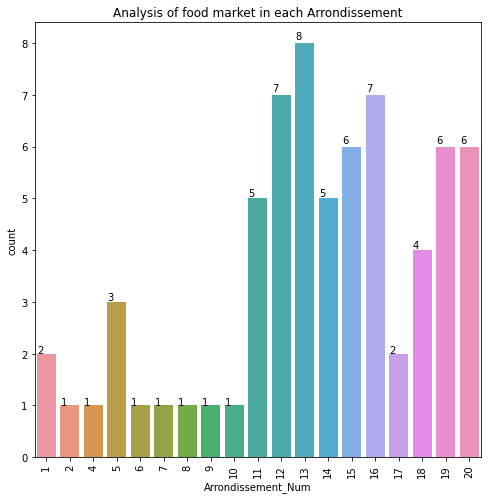

In [34]:
import seaborn as sns

fig,ax = plt.subplots(1, 1, figsize=(8, 8))
sns.countplot(x='Arrondissement_Num',data=df_market)
ax.set_title("Analysis of food market in each Arrondissement")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

We can see that arrondissements 12, 13 and 16 have the most number of food markets. So for freshness and lower cost of ingredients, a restaurant can be started in one of these arrondissements.

#### Number of Indian Restaurants present in each neighborhood of Paris

Here a list of Indian Restaurants along with the venues present in each arrondissement are shown below

In [35]:
c=0
for item,n,v in zip(paris_venues['Venue_Category'],paris_venues['Neighborhood'],paris_venues["Venue"]):
    if item=="Indian Restaurant":
        c+=1
        print(n,v)
print(c)

Entrepot Marcel
Entrepot Sheezan
Entrepot Saravanaa Bhavan
Entrepot Bombay Palace
Buttes-Montmartre Azaytoona
Vaugirard Indian Villa
Vaugirard Arti
7


## Number of Indian Restaurants present in each arrondissement of Paris

Let's visualize the number of Indian restaurants present in each arrondissement in Paris using Matplotlib library.

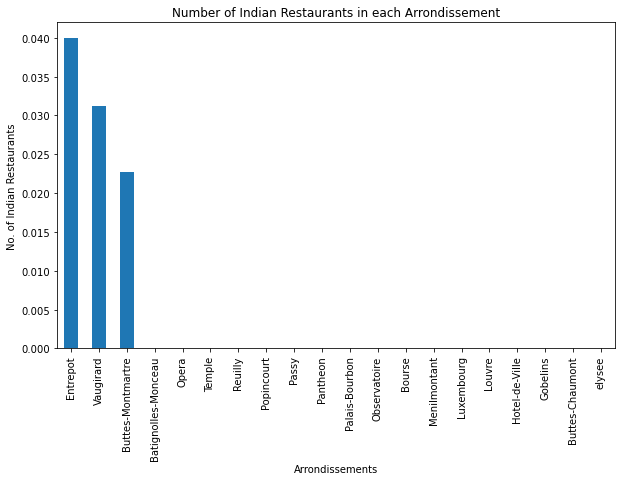

In [36]:
g=pd.DataFrame(paris_onehot.groupby("Neighborhood")['Indian Restaurant'].mean())
g=g.sort_values(by='Indian Restaurant',ascending=False)
g.plot(kind="bar",legend=None,figsize=(10,6))
plt.xlabel("Arrondissements")
plt.ylabel("No. of Indian Restaurants")
plt.title("Number of Indian Restaurants in each Arrondissement")
plt.show()

Here, we can see there are only four arrondissements having Indian restaurants in Paris i.e Entrepot,Vaugirard,Buttes-Montmartre,and Menilmontant.

### Indian Restaurants present in each arrondissement are known by calculating mean

In [37]:
paris_i=pd.DataFrame(paris_onehot.groupby("Neighborhood")['Indian Restaurant'].mean())
paris_i=paris_i.sort_values(by='Indian Restaurant',ascending=False).reset_index()
paris_i

,Neighborhood,Indian Restaurant
0,Entrepot,0.040000
1,Vaugirard,0.031250
2,Buttes-Montmartre,0.022727
3,Batignolles-Monceau,0.000000
4,Opera,0.000000
5,Temple,0.000000
6,Reuilly,0.000000
7,Popincourt,0.000000
8,Passy,0.000000
9,Pantheon,0.000000


### Population present in each arrondissement in Paris

Let's visualize the population present in each arrondissement in Paris

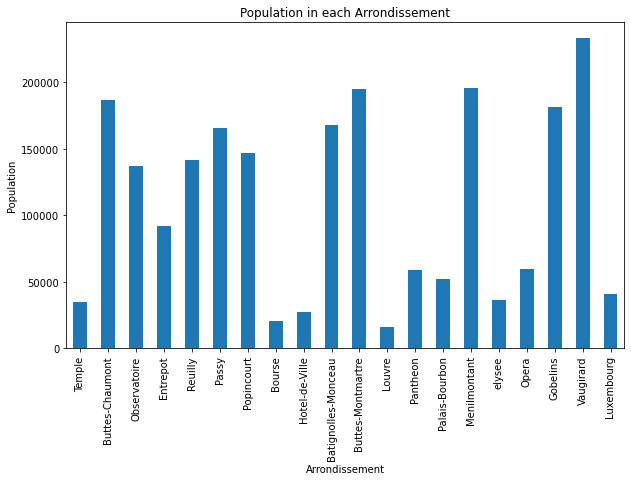

In [38]:
b=pd.DataFrame(df[['Neighborhood','Population_in_2019']])
b.set_index('Neighborhood',inplace=True)
b.plot(kind="bar",legend=None,figsize=(10,6))
plt.xlabel("Arrondissement")
plt.ylabel("Population")
plt.title("Population in each Arrondissement")
plt.show()

### Population present in Top 5 arrondissements

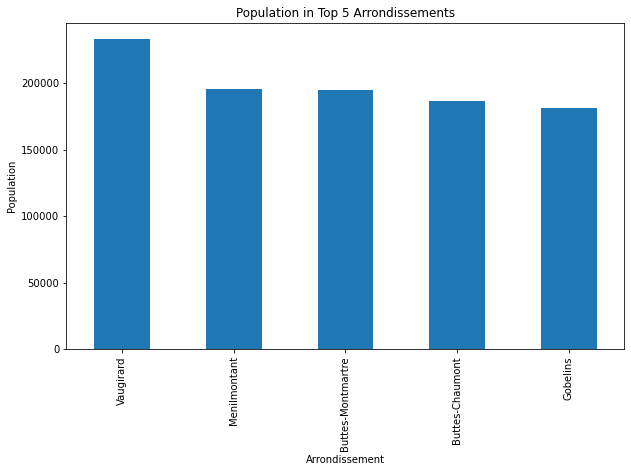

In [39]:
b=pd.DataFrame(pop[['Neighborhood','Population_in_2019']])
b.set_index('Neighborhood',inplace=True)
b.plot(kind="bar",legend=None,figsize=(10,6))
plt.xlabel("Arrondissement")
plt.ylabel("Population")
plt.title("Population in Top 5 Arrondissements")
plt.show()

## Clustering Neighborhoods in Paris


In this section of the project, we will use the Foursquare API to explore neighborhoods in each arrondissement. We explored the most common venue categories in each neighborhood, and now we use this feature to group the neighborhoods into clusters. We will use the k-means clustering algorithm to complete this task. Finally, we will use the Folium library to visualize the neighborhoods in each one of 20 arrondissements in paris and their emerging clusters.

In [40]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 3

paris_grouped_clustering = paris_i.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 2, 2, 0, 0, 0, 0, 0, 0, 0])

In [41]:
# add clustering labels
paris_venues_sorted['Cluster Labels']= kmeans.labels_
paris_merged = df.join(paris_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
paris_merged

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude,Population_in_2019,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,3,Temple,3eme Ardt,48.862872,2.360001,34788,French Restaurant,Italian Restaurant,Japanese Restaurant,Bakery,Coffee Shop,Art Gallery,Gourmet Shop,Wine Bar,Sandwich Place,Cocktail Bar,0
1,19,Buttes-Chaumont,19eme Ardt,48.887076,2.384821,186393,Bar,French Restaurant,Bistro,Seafood Restaurant,Café,Hotel,Supermarket,Beer Bar,Food & Drink Shop,Steakhouse,2
2,14,Observatoire,14eme Ardt,48.829245,2.326542,137105,French Restaurant,Hotel,Plaza,Bistro,Bakery,Pizza Place,Brasserie,Sushi Restaurant,Tea Room,Food & Drink Shop,0
3,10,Entrepot,10eme Ardt,48.876130,2.360728,91932,French Restaurant,Hotel,Coffee Shop,Indian Restaurant,Bistro,Café,Pizza Place,Japanese Restaurant,Bar,Italian Restaurant,0
4,12,Reuilly,12eme Ardt,48.834974,2.421325,141494,Zoo Exhibit,Supermarket,Lawyer,Monument / Landmark,Zoo,Cosmetics Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Exhibit,0
5,16,Passy,16eme Ardt,48.860392,2.261971,165446,Plaza,Lake,Pool,French Restaurant,Art Museum,Bus Station,Boat or Ferry,Bus Stop,Bike Rental / Bike Share,Park,0
6,11,Popincourt,11eme Ardt,48.859059,2.380058,147017,French Restaurant,Café,Pastry Shop,Wine Bar,Restaurant,Supermarket,Pizza Place,Cocktail Bar,Theater,Asian Restaurant,0
7,2,Bourse,2eme Ardt,48.868279,2.342803,20260,French Restaurant,Wine Bar,Hotel,Cocktail Bar,Bakery,Coffee Shop,Bistro,Indie Movie Theater,Thai Restaurant,Concert Hall,2
8,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630,27487,French Restaurant,Ice Cream Shop,Hotel,Clothing Store,Italian Restaurant,Wine Bar,Plaza,Pedestrian Plaza,Tea Room,Coffee Shop,0
9,17,Batignolles-Monceau,17eme Ardt,48.887327,2.306777,167835,French Restaurant,Hotel,Italian Restaurant,Bakery,Plaza,Japanese Restaurant,Bistro,Restaurant,Café,Bar,1


In [42]:
paris_merged.shape

(20, 17)

### Create a Map with Arrondissements and Cluster labels superimposed 

Finally, let's visualize the resulting clusters

In [43]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['Neighborhood'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.6).add_to(map_clusters)
       
map_clusters

## Examine the Clusters

Examine first cluster 

In [44]:
paris_merged[paris_merged['Cluster Labels'] == 0]

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude,Population_in_2019,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,3,Temple,3eme Ardt,48.862872,2.360001,34788,French Restaurant,Italian Restaurant,Japanese Restaurant,Bakery,Coffee Shop,Art Gallery,Gourmet Shop,Wine Bar,Sandwich Place,Cocktail Bar,0
2,14,Observatoire,14eme Ardt,48.829245,2.326542,137105,French Restaurant,Hotel,Plaza,Bistro,Bakery,Pizza Place,Brasserie,Sushi Restaurant,Tea Room,Food & Drink Shop,0
3,10,Entrepot,10eme Ardt,48.876130,2.360728,91932,French Restaurant,Hotel,Coffee Shop,Indian Restaurant,Bistro,Café,Pizza Place,Japanese Restaurant,Bar,Italian Restaurant,0
4,12,Reuilly,12eme Ardt,48.834974,2.421325,141494,Zoo Exhibit,Supermarket,Lawyer,Monument / Landmark,Zoo,Cosmetics Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Exhibit,0
5,16,Passy,16eme Ardt,48.860392,2.261971,165446,Plaza,Lake,Pool,French Restaurant,Art Museum,Bus Station,Boat or Ferry,Bus Stop,Bike Rental / Bike Share,Park,0
6,11,Popincourt,11eme Ardt,48.859059,2.380058,147017,French Restaurant,Café,Pastry Shop,Wine Bar,Restaurant,Supermarket,Pizza Place,Cocktail Bar,Theater,Asian Restaurant,0
8,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630,27487,French Restaurant,Ice Cream Shop,Hotel,Clothing Store,Italian Restaurant,Wine Bar,Plaza,Pedestrian Plaza,Tea Room,Coffee Shop,0
10,18,Buttes-Montmartre,18eme Ardt,48.892569,2.348161,195060,Bar,French Restaurant,Coffee Shop,Hotel,Café,Restaurant,Convenience Store,Pool,Sandwich Place,Cheese Shop,0
11,1,Louvre,1er Ardt,48.862563,2.336443,16252,French Restaurant,Japanese Restaurant,Plaza,Hotel,Italian Restaurant,Café,Art Museum,Cheese Shop,Thai Restaurant,Brasserie,0
12,5,Pantheon,5eme Ardt,48.844443,2.350715,59108,French Restaurant,Science Museum,Hotel,Italian Restaurant,Bakery,Pub,Bar,Coffee Shop,Plaza,Pizza Place,0


Examine second cluster

In [45]:
paris_merged[paris_merged['Cluster Labels'] == 1]

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude,Population_in_2019,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
9,17,Batignolles-Monceau,17eme Ardt,48.887327,2.306777,167835,French Restaurant,Hotel,Italian Restaurant,Bakery,Plaza,Japanese Restaurant,Bistro,Restaurant,Café,Bar,1


Examine third cluster

In [46]:
paris_merged[paris_merged['Cluster Labels'] == 2]

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude,Population_in_2019,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
1,19,Buttes-Chaumont,19eme Ardt,48.887076,2.384821,186393,Bar,French Restaurant,Bistro,Seafood Restaurant,Café,Hotel,Supermarket,Beer Bar,Food & Drink Shop,Steakhouse,2
7,2,Bourse,2eme Ardt,48.868279,2.342803,20260,French Restaurant,Wine Bar,Hotel,Cocktail Bar,Bakery,Coffee Shop,Bistro,Indie Movie Theater,Thai Restaurant,Concert Hall,2


# Results and Discussion

Our data analysis and visualization using Folium maps and Foursquare data shown that a large number of Indian Restaurants are present in four arrondissements of Paris such as Entrepot,Vaugirard,Buttes-Montmartre,and Menilmontant.Out of these four arrondissements,three arrondissements are in top five highly populated areas except for Entrepot.The number of Indian Restaurants are mostly present in this highly populated arrondissements.Considering the factor of competition we cannot setup a Indian restaurant in these areas.Our analysis on Farmer's Market of each arrondissement in Paris has shown that arrondissements Reuilly,Gobellins and Passy have most number of farmer markets.For freshness and lower cost of ingredients,we can consider this locations for setting up a Indian Restaurant.A exploratory data analysis rendered nearby venues of each arrondissement in Paris.The analysis of each arrondissement provided the top most ten common venue categories of each arrondissement in determining the best suitable location for setting up the restaurant.The Clustering of arrondissements resulted in showing three clusters in which cluster1 shows most number of arrondissements with venues.As considering the factors of population,farmer's market,and most entertaining venues we can recommend the arrondissements Reuilly,Gobellins,and Passy for setting up the restaurant.But Gobellins has various number of restaurants and less entertaining public places,so we can recommend Reuilly or Passy for setting up a new Indian Restaurant as both of them have more entertaining public places.  

# Conclusion

This project helps in to have a better understanding of the neighborhoods with respect to the most common venues in that neighborhood.The analysis enabled us in figuring out two main regions for setting up the restaurant which are mostly visited by the tourists and locals.Further based analysis can provide which specific cuisine should be served by the restaurant for maximizing profits and it's up to the entrepreneur or stakeholder's final decision for choosing a recommended place,considering some features like cost of budget for setting up the restaurant.